# Vancouver Air Quality Analysis

In [85]:
# importing the needed libraries
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Importing Vacouver(Kelowna KLO Road) Data

In [86]:
# importing the csv file
vancouver = pd.read_csv("vancouver(Kelowna KLO Road).csv")
vancouver.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01T01:00:00+00:00,2023-12-31T17:00:00-08:00,America/Vancouver,49.862119,-119.467461,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01T02:00:00+00:00,2023-12-31T18:00:00-08:00,America/Vancouver,49.862119,-119.467461,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
2,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01T03:00:00+00:00,2023-12-31T19:00:00-08:00,America/Vancouver,49.862119,-119.467461,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
3,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01T04:00:00+00:00,2023-12-31T20:00:00-08:00,America/Vancouver,49.862119,-119.467461,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
4,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01T05:00:00+00:00,2023-12-31T21:00:00-08:00,America/Vancouver,49.862119,-119.467461,NaN,NaN,NaN,Unknown Governmental Organization,AirNow


## Describing the data

In [87]:
# showing the shape of the dataset
print(f'The Tuen Mun dataset is made up of{vancouver.shape}')

# showing the information about the dataset.
vancouver.info()

The Tuen Mun dataset is made up of(16820, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16820 entries, 0 to 16819
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    16820 non-null  int64  
 1   location_name  16820 non-null  object 
 2   parameter      16820 non-null  object 
 3   value          16820 non-null  float64
 4   unit           16820 non-null  object 
 5   datetimeUtc    16820 non-null  object 
 6   datetimeLocal  16820 non-null  object 
 7   timezone       16820 non-null  object 
 8   latitude       16820 non-null  float64
 9   longitude      16820 non-null  float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     16820 non-null  object 
 14  provider       16820 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.9+ MB


## Cleaning the data

In [88]:
# drop the unnecessary columns
"""
This function drops all the unnecessary columns in the dataset.
"""
from datetime import UTC


def clean_data(vancouver):
    # Drop column: 'country_iso'
    vancouver = vancouver.drop(columns=['country_iso'])
    # Drop column: 'isMobile'
    vancouver = vancouver.drop(columns=['isMobile'])
    # Drop column: 'isMonitor'
    vancouver = vancouver.drop(columns=['isMonitor'])
    # Drop column: 'owner_name'
    vancouver = vancouver.drop(columns=['owner_name'])
    # Drop column: 'provider'
    vancouver = vancouver.drop(columns=['provider'])
    # Drop column: 'latitude'
    vancouver = vancouver.drop(columns=['latitude'])
    # Drop column: 'longitude'
    vancouver = vancouver.drop(columns=['longitude'])
    return vancouver

vancouver_clean = clean_data(vancouver.copy()) 

# checking for duplicate values
dup = vancouver_clean.duplicated().sum()
print(f'The number of duplicated values is: {dup}')

# checking for missing values
miss = vancouver_clean.isnull().sum()
print(f'The number of missing values is {miss}')

# converting datetime for Utc and Local to datetime format
vancouver_clean['datetimeUtc'] = pd.to_datetime(vancouver_clean['datetimeUtc'],utc=True)
vancouver_clean['datetimeLocal'] = pd.to_datetime(vancouver_clean['datetimeLocal'])

# setting datetime local and utc to index
vancouver_clean.set_index(vancouver_clean['datetimeLocal'])
vancouver_clean.set_index(vancouver_clean['datetimeUtc'])

# displaying the first 10 observations
vancouver_clean.head(10)

The number of duplicated values is: 0
The number of missing values is location_id      0
location_name    0
parameter        0
value            0
unit             0
datetimeUtc      0
datetimeLocal    0
timezone         0
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_14152\1790427935.py:37: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  vancouver_clean['datetimeLocal'] = pd.to_datetime(vancouver_clean['datetimeLocal'])


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone
0,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 01:00:00+00:00,2023-12-31 17:00:00-08:00,America/Vancouver
1,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 02:00:00+00:00,2023-12-31 18:00:00-08:00,America/Vancouver
2,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 03:00:00+00:00,2023-12-31 19:00:00-08:00,America/Vancouver
3,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 04:00:00+00:00,2023-12-31 20:00:00-08:00,America/Vancouver
4,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 05:00:00+00:00,2023-12-31 21:00:00-08:00,America/Vancouver
5,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 06:00:00+00:00,2023-12-31 22:00:00-08:00,America/Vancouver
6,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 07:00:00+00:00,2023-12-31 23:00:00-08:00,America/Vancouver
7,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 08:00:00+00:00,2024-01-01 00:00:00-08:00,America/Vancouver
8,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 09:00:00+00:00,2024-01-01 01:00:00-08:00,America/Vancouver
9,230097,Kelowna KLO Road,co,0.2,ppm,2024-01-01 10:00:00+00:00,2024-01-01 02:00:00-08:00,America/Vancouver


In [89]:
# creating a pivot table
vancouver_pivot = vancouver_clean.pivot_table(
    values='value',
    index=['datetimeLocal', 'datetimeUtc'],
    columns='parameter'
)
# resetting the index for readability
vancouver_pivot.reset_index(inplace=True)


# filling the missing value with 0
vancouver_pivot = vancouver_pivot.fillna(0)

# displaying the first 10 obs.
vancouver_pivot.head(10)

parameter,datetimeLocal,datetimeUtc,co,o3,pm10,pm25
0,2023-12-31 17:00:00-08:00,2024-01-01 01:00:00+00:00,0.2,0.007,4.0,1.1
1,2023-12-31 18:00:00-08:00,2024-01-01 02:00:00+00:00,0.2,0.009,3.0,1.2
2,2023-12-31 19:00:00-08:00,2024-01-01 03:00:00+00:00,0.2,0.000,3.0,1.1
3,2023-12-31 20:00:00-08:00,2024-01-01 04:00:00+00:00,0.2,0.010,2.0,0.4
4,2023-12-31 21:00:00-08:00,2024-01-01 05:00:00+00:00,0.2,0.010,2.0,0.9
5,2023-12-31 22:00:00-08:00,2024-01-01 06:00:00+00:00,0.2,0.010,2.0,1.5
6,2023-12-31 23:00:00-08:00,2024-01-01 07:00:00+00:00,0.2,0.008,3.0,3.7
7,2024-01-01 00:00:00-08:00,2024-01-01 08:00:00+00:00,0.2,0.009,5.0,2.8
8,2024-01-01 01:00:00-08:00,2024-01-01 09:00:00+00:00,0.2,0.012,5.0,1.9
9,2024-01-01 02:00:00-08:00,2024-01-01 10:00:00+00:00,0.2,0.011,5.0,1.9


## Descriptive statistics
* This will focus on the basic descriptive statistics for the pollutants.
This will include the mean, mode, median, maximum value and the minimum value as well as the quartiles

In [90]:
# describing the vancouver_pivot
desc = [vancouver_pivot['co'].describe(),vancouver_pivot['o3'].describe(),vancouver_pivot['pm10'].describe(),vancouver_pivot['pm25'].describe()]
desc = pd.DataFrame(desc)
print("The descriptive statistics for the pollutants is:", '\n', desc)

The descriptive statistics for the pollutants is: 
        count       mean       std    min   25%   50%     75%      max
co    4294.0   0.198184  0.083687  0.000  0.20  0.20   0.200    0.700
o3    4294.0   0.018010  0.010268 -0.001  0.01  0.02   0.026    0.041
pm10  4294.0  10.983232  9.558295  0.000  5.00  8.00  14.000  120.000
pm25  4294.0   3.893130  3.940448  0.000  1.10  2.80   5.300   40.000


## Calculating The Air Quality Index For Each Parameter and the Total AQI
The AQI is calculated based on air pollutant concentrations over a specific averaging period (usually 24 hours). These concentrations are obtained from air monitors or models.
The Air Quality Index (AQI) provides a numerical value that reflects the concentration of air pollutants in the ambient air. These pollutants include things like particulate matter (PM2.5 and PM10), ozone (O3), and carbon monoxide (CO).

In [91]:
# create a breakpoint dictionary
breakpoints = {
    'o3': [(0.000, 0.054, 0, 50), (0.055, 0.070, 51, 100), (0.071, 0.085, 101, 150), (0.086, 0.105, 151, 200), (0.106, 0.200, 201, 300)],
    'co': [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300)],
    'pm25': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300)],
    'pm10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300)]
}
# declare a function calculate_aqi
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return (bp[3] - bp[2]) / (bp[1] - bp[0]) * (concentration - bp[0]) + bp[2]
    return None
# Sample DataFrame with pollutant concentrations
data = {
    'datetimeUtc': pd.date_range(start='2024-01-01', periods=4369, freq='h'),
    'o3': np.random.uniform(0, 0.2, 4369),
    'co': np.random.uniform(0, 15, 4369),
    'pm25': np.random.uniform(0, 250, 4369),
    'pm10': np.random.uniform(0, 430, 4369)
}
vancouver_aqi = pd.DataFrame(data)

# Calculate AQI for each pollutant
vancouver_aqi['AQI_o3'] = vancouver_aqi['o3'].apply(lambda x: calculate_aqi(x, breakpoints['o3']))
vancouver_aqi['AQI_co'] = vancouver_aqi['co'].apply(lambda x: calculate_aqi(x, breakpoints['co']))
vancouver_aqi['AQI_pm25'] = vancouver_aqi['pm25'].apply(lambda x: calculate_aqi(x, breakpoints['pm25']))
vancouver_aqi['AQI_pm10'] = vancouver_aqi['pm10'].apply(lambda x: calculate_aqi(x, breakpoints['pm10']))

# Calculate overall AQI as the maximum of individual AQIs
vancouver_aqi['AQI'] = vancouver_aqi[['AQI_o3', 'AQI_co', 'AQI_pm25', 'AQI_pm10']].max(axis=1)#type: ignore

# filling the missing values with the mean
vancouver_aqi.fillna(value=vancouver_aqi.mean())

# setting datetimeUtc as index
vancouver_aqi.set_index(vancouver_aqi['datetimeUtc'], inplace=True)
vancouver_aqi.tail(10)

,datetimeUtc,o3,co,pm25,pm10,AQI_o3,AQI_co,AQI_pm25,AQI_pm10,AQI
datetimeUtc,,,,,,,,,,
2024-06-30 15:00:00,2024-06-30 15:00:00,0.195883,12.467995,156.651041,270.368707,295.664448,NaN,207.095626,158.606734,295.664448
2024-06-30 16:00:00,2024-06-30 16:00:00,0.034186,8.308366,131.603560,187.166806,31.653676,89.083657,190.294778,116.920945,190.294778
2024-06-30 17:00:00,2024-06-30 17:00:00,0.069750,9.349408,230.830664,7.073708,99.182898,99.494075,280.606964,6.549730,280.606964
2024-06-30 18:00:00,2024-06-30 18:00:00,0.149594,3.932246,147.487806,186.756554,246.912810,44.684619,198.496338,116.717890,246.912810
2024-06-30 19:00:00,2024-06-30 19:00:00,0.170799,8.233265,141.441226,397.650250,269.246278,88.332649,195.374289,262.193837,269.246278
2024-06-30 20:00:00,2024-06-30 20:00:00,0.013358,1.647139,21.477736,58.801347,12.368888,18.717488,70.721419,52.881475,70.721419
2024-06-30 21:00:00,2024-06-30 21:00:00,0.189632,14.887992,20.123996,339.489562,289.080018,191.348837,67.874499,192.818066,289.080018
2024-06-30 22:00:00,2024-06-30 22:00:00,0.081708,8.426199,198.204463,344.681054,138.478822,90.261989,248.274693,195.387592,248.274693
2024-06-30 23:00:00,2024-06-30 23:00:00,0.151302,8.646793,42.312973,398.595367,248.711467,92.467929,117.775663,263.549875,263.549875


## Exploratory Data analysis
* Here, we will compare the level of AQI for each pollutant in for each hour.
* We will then resample the data to a daily and monthly basis to using mean as an aggregate function.
* We will also analyse the trends of the total AQI in the six months.
* We will compare the level of pollutants using a piechart
* We will analyse the relationship between each pollutant using a correlation heatmap.
* We will compare the hourly trends of the total AQI and also do the same with a resampled data
* Finally, we will detect seasonality using Additive decomposition. 

Tools to be used include a lineplot, timeplot, correlation heatmap

## Comparing the AQI level of pollutants hourly.

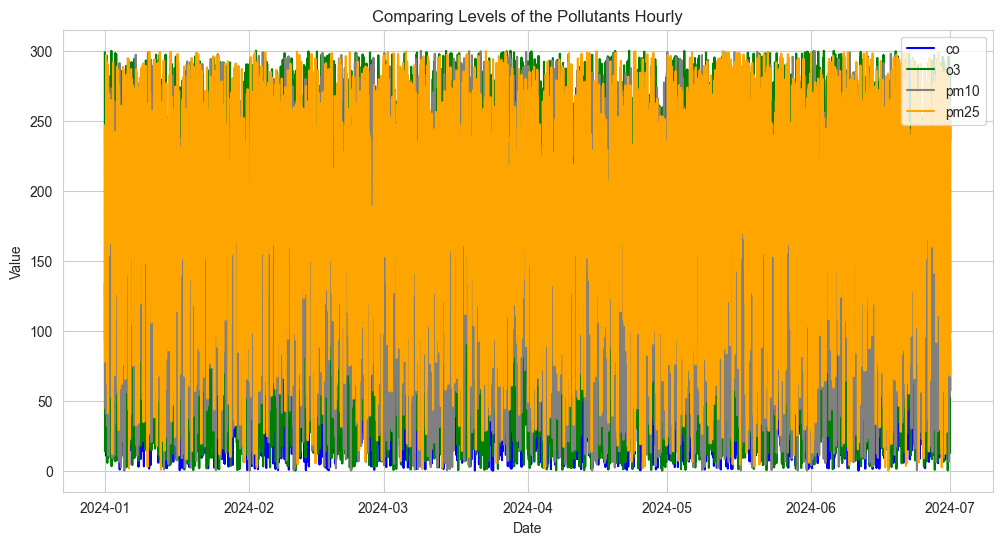

In [92]:
# comparing the level of each pollutant
# setting the figure size
# type: ignore
plt.figure(figsize=(12,6))
sns.lineplot(data = vancouver_aqi, x='datetimeUtc', y='AQI_co', label='co', color='blue')
sns.lineplot(data = vancouver_aqi, x='datetimeUtc', y='AQI_o3', label='o3', color='green')
sns.lineplot(data = vancouver_aqi, x='datetimeUtc', y='AQI_pm10', label='pm10', color='grey')
sns.lineplot(data = vancouver_aqi, x='datetimeUtc', y='AQI_pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Hourly')
plt.legend()
plt.grid(True)
plt.show()

## Comparing the AQI levels resampled Daily

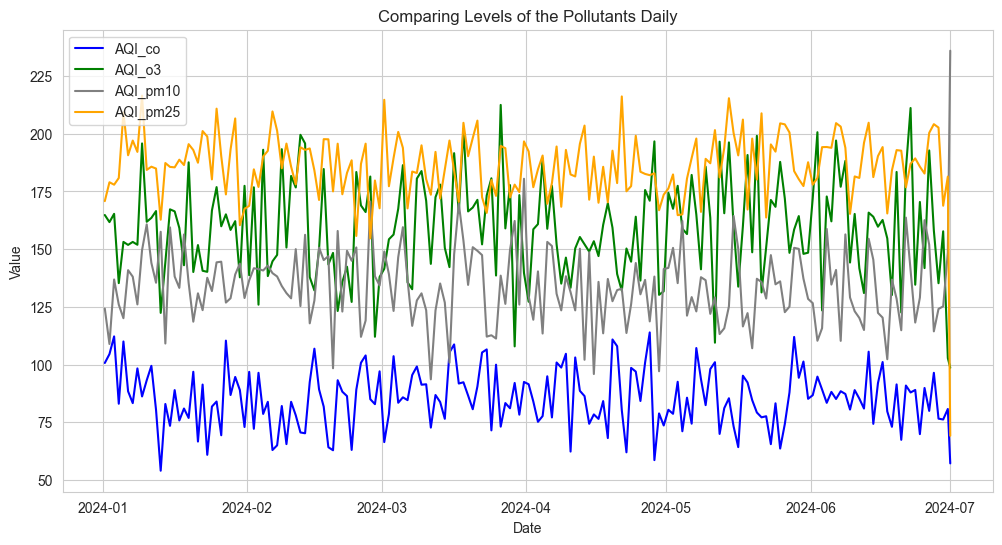

In [93]:
# Resampling the data to daily basis for a clearer view
vancouver_aqi_resampled_daily = vancouver_aqi.resample('D').mean()  # type: ignore

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = vancouver_aqi_resampled_daily, x='datetimeUtc', y='AQI_co', label='AQI_co', color='blue')
sns.lineplot(data = vancouver_aqi_resampled_daily, x='datetimeUtc', y='AQI_o3', label='AQI_o3', color='green')
sns.lineplot(data = vancouver_aqi_resampled_daily, x='datetimeUtc', y='AQI_pm10', label='AQI_pm10', color='grey')
sns.lineplot(data = vancouver_aqi_resampled_daily, x='datetimeUtc', y='AQI_pm25', label='AQI_pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Daily')
plt.legend()
plt.show()

## Comparing the AQI levels Resampled Monthly

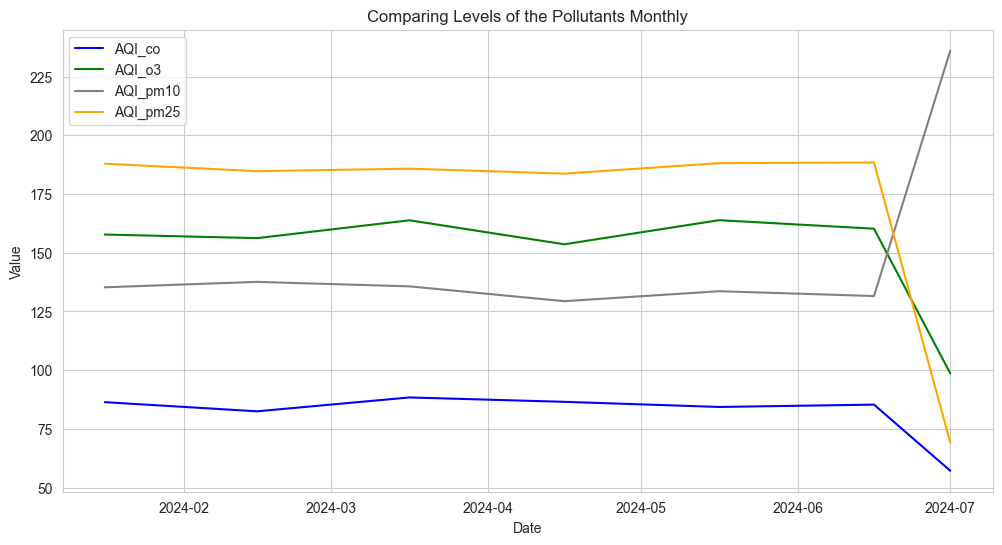

In [94]:
# resampling it to a monthly basis
vancouver_aqi_resampled_monthly = vancouver_aqi.resample('ME').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = vancouver_aqi_resampled_monthly, x='datetimeUtc', y='AQI_co', label='AQI_co', color='blue')
sns.lineplot(data = vancouver_aqi_resampled_monthly, x='datetimeUtc', y='AQI_o3', label='AQI_o3', color='green')
sns.lineplot(data = vancouver_aqi_resampled_monthly, x='datetimeUtc', y='AQI_pm10', label='AQI_pm10', color='grey')
sns.lineplot(data = vancouver_aqi_resampled_monthly, x='datetimeUtc', y='AQI_pm25', label='AQI_pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Monthly')
plt.legend()
plt.show()

### Correlation heatmap for the pollutants

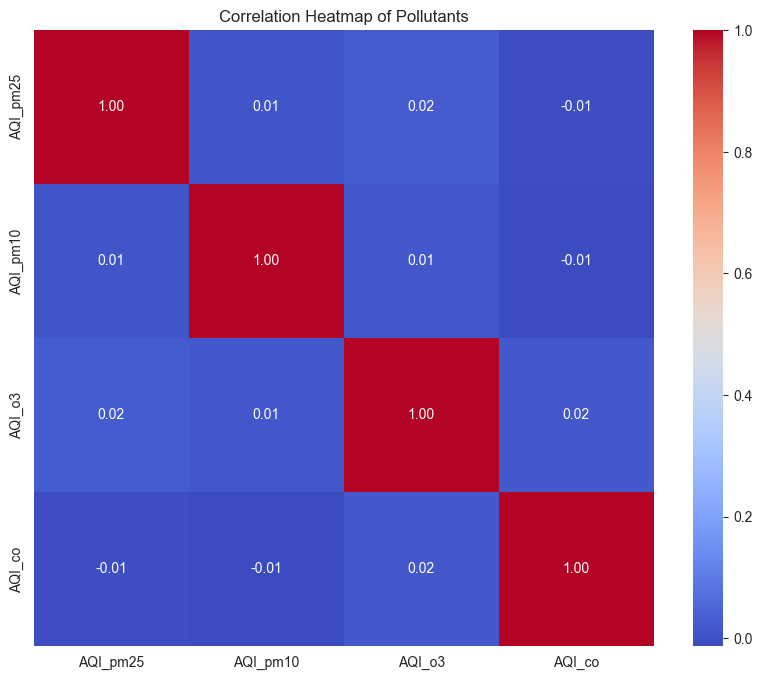

In [95]:
# correlation heatmap for the pollutants
# selecting the pollutants
pollutants = ['AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_co']

# calculating the correlation matrix
corr_matrix = vancouver_aqi[pollutants].corr() # type: ignore
# plotting a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of Pollutants')
plt.show()

## A Lineplot for the AQI trends
* Here, we will create a lineplot to visualize the AQI trends for a six month time period.
* We will first visualize it hourly and then use the resampled format for daily for a clearer view.

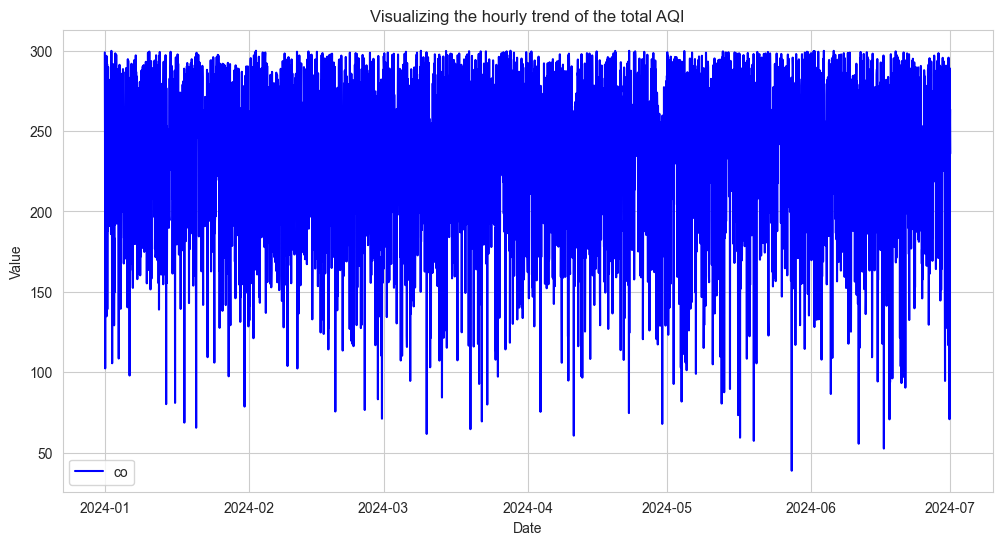

In [96]:
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = vancouver_aqi, x='datetimeUtc', y='AQI', label='co', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the hourly trend of the total AQI')
plt.legend()
plt.grid(True)
plt.show()

Resampling to dailty to get a clearer view.

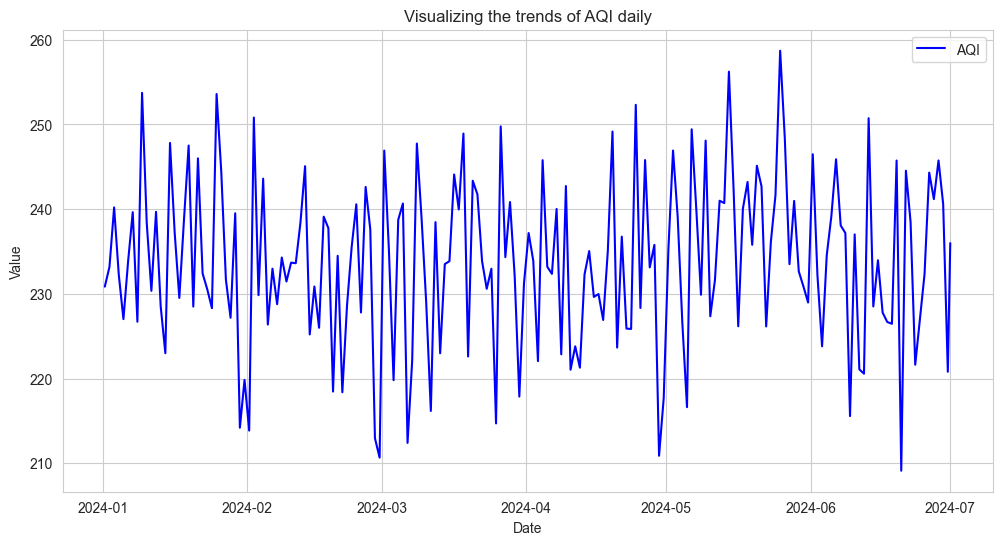

In [97]:
# comparing the level of each pollutant
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = vancouver_aqi_resampled_daily, x='datetimeUtc', y='AQI', label='AQI', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the trends of AQI daily')
plt.legend()
plt.grid(True)
plt.show()

## Detecting Seasonality using Additive Decomposition.
In this example, we will use the `additive_decomposition` function from the `statsmodels
The Additive decomposition separates the time series into trend, seasonal, and residual components assuming that the time series is equal to trend + seasonality + noise

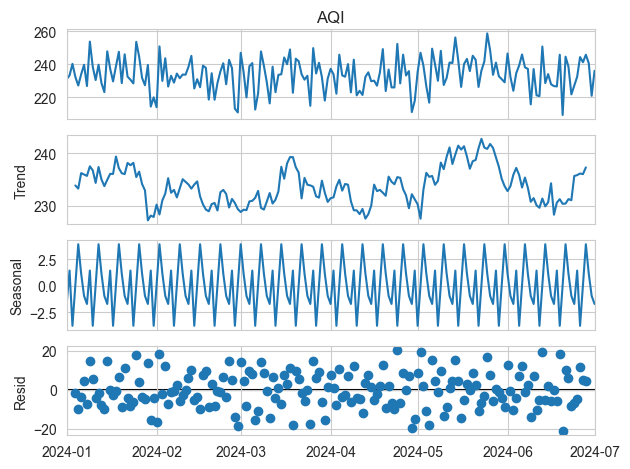

In [98]:
# checking for seasonality
result = seasonal_decompose(vancouver_aqi_resampled_daily['AQI'], model='additive')
result.plot()
plt.show()

###  Creating Subplots for the Daily AQI Levels

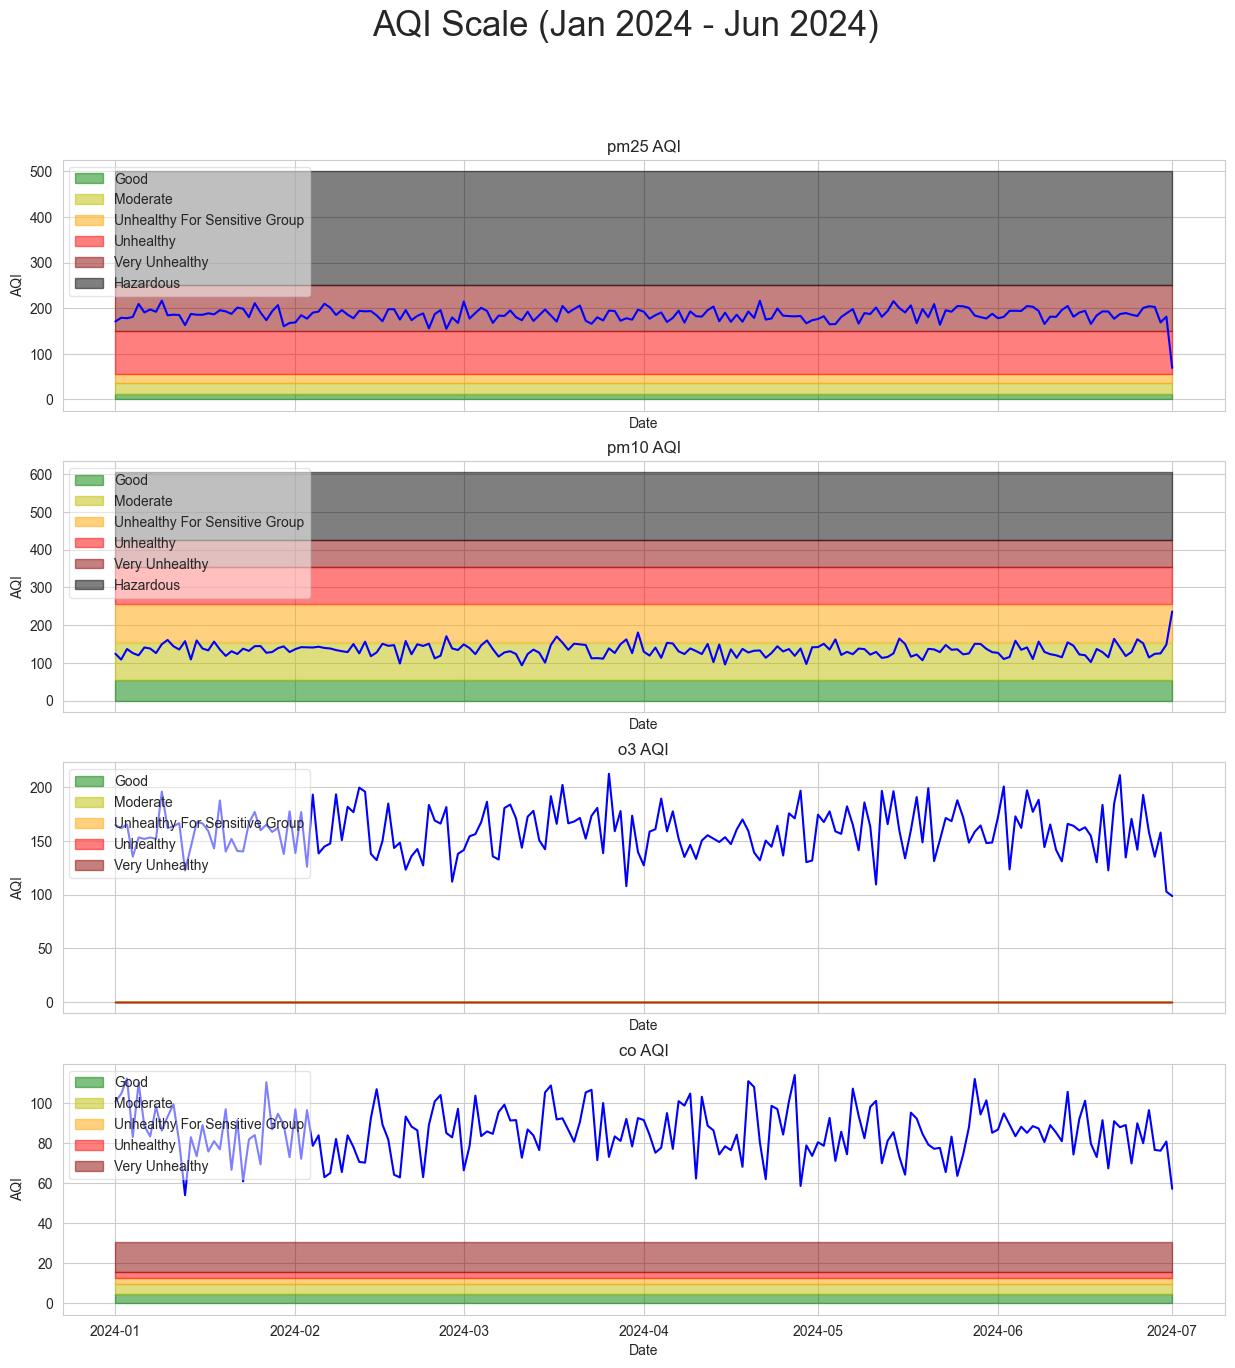

In [99]:
# create a breakpoint dictionary
breakpoints = {
    'o3': [(0.000, 0.054, 0, 50), (0.055, 0.070, 51, 100), (0.071, 0.085, 101, 150), (0.086, 0.105, 151, 200), (0.106, 0.200, 201, 300)],
    'co': [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300)],
    'pm25': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300)],
    'pm10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300)]
}

def index_scale(plotnumber, data, pollutant):
    if pollutant == 'pm25':
        scales = [(0, 12, 'Good', 'g'), (12.1, 35.4, 'Moderate', 'y'), (35.5, 55.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (55.5, 150.4, 'Unhealthy', 'r'), (150.5, 250.4, 'Very Unhealthy', 'darkred'), (250.5, 500.4, 'Hazardous', 'black')]
    elif pollutant == 'pm10':
        scales = [(0, 54, 'Good', 'g'), (55, 154, 'Moderate', 'y'), (155, 254, 'Unhealthy For Sensitive Group', 'orange'),
                  (255, 354, 'Unhealthy', 'r'), (355, 424, 'Very Unhealthy', 'darkred'), (425, 604, 'Hazardous', 'black')]
    elif pollutant == 'o3':
        scales = [(0.000, 0.054, 'Good', 'g'), (0.055, 0.070, 'Moderate', 'y'), (0.071, 0.085, 'Unhealthy For Sensitive Group', 'orange'),
                  (0.086, 0.105, 'Unhealthy', 'r'), (0.106, 0.200, 'Very Unhealthy', 'darkred')]
    elif pollutant == 'co':
        scales = [(0.0, 4.4, 'Good', 'g'), (4.5, 9.4, 'Moderate', 'y'), (9.5, 12.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (12.5, 15.4, 'Unhealthy', 'r'), (15.5, 30.4, 'Very Unhealthy', 'darkred')]
    
    for scale in scales:
        axs[plotnumber].fill_between(x=data.index, y1=scale[0], y2=scale[1], alpha=0.5, label=scale[2], color=scale[3])
    axs[plotnumber].set_title(f'{pollutant} AQI')
    axs[plotnumber].legend(loc='upper left', framealpha=0.5)
    axs[plotnumber].set_xlabel('Date')
    axs[plotnumber].set_ylabel('AQI')

# Create subplots to visualize the AQI data from January to June 2024
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(15, 15))
fig.suptitle('AQI Scale (Jan 2024 - Jun 2024)', fontsize=25)
pollutants = ['pm25', 'pm10', 'o3', 'co']

for i, pollutant in enumerate(pollutants):
    axs[i].plot(vancouver_aqi_resampled_daily[f'AQI_{pollutant}'], color='blue')
    index_scale(i, vancouver_aqi_resampled_daily, pollutant)

plt.show()


## Comparing the level of pollutants in Tuen Mun

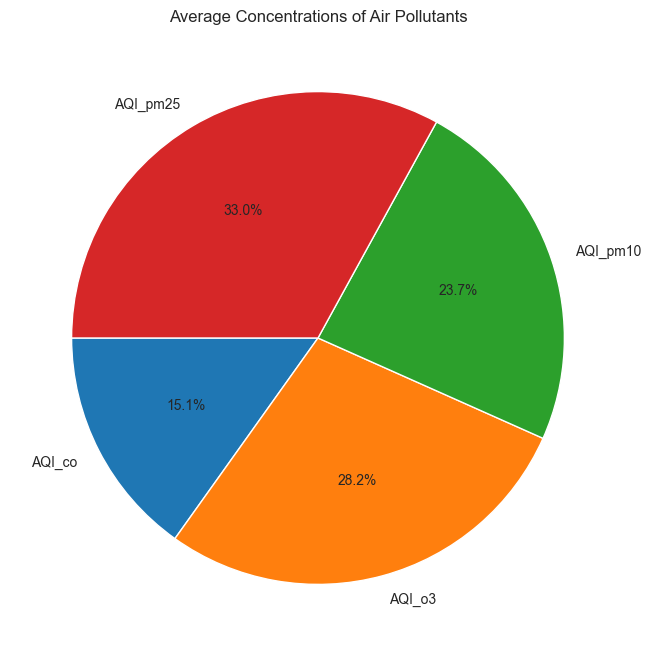

In [100]:
# creating a piechart to comare the levels of the pollutants

# Calculate average values
average_values = vancouver_aqi[['AQI_co', 'AQI_o3', 'AQI_pm10', 'AQI_pm25']].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_values, labels=average_values.index, autopct='%1.1f%%', startangle=180) # type: ignore
plt.title('Average Concentrations of Air Pollutants')
plt.show()
        

## Generating a predictive model
This Model will follow the following steps:
1. **Feature Engineering**: Create lagged features for pollutants (`co_lag1`, `o3_lag1`, `pm10_lag1`, `pm25_lag1`).
2. **Dropping Missing Values**: Drop rows with missing values caused by the lagging process.
3. **Defining Features and Target**: Lagged pollutant values as features (X) and current pollutant values as the target (y).
4. **Data Splitting**: Split the data into training and testing sets.
5. **Model Training**: Train a linear regression model on the training data.
6. **Prediction and Evaluation**: Make predictions on the test set and calculate the Mean Squared Error (MSE).
7. **Scatter Plot**: Create a scatter plot to visualize the actual vs. predicted values for each pollutant levels, along with an ideal fit line (red).

Mean Squared Error: 227.61639094441654


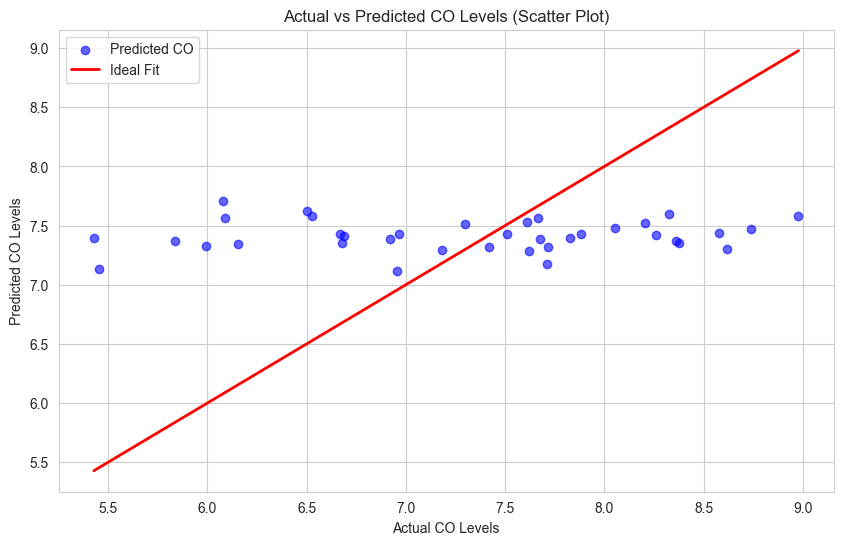

In [101]:
# Feature Engineering: Create lagged features
vancouver_aqi_resampled_daily['co_lag1'] = vancouver_aqi_resampled_daily['co'].shift(1)
vancouver_aqi_resampled_daily['o3_lag1'] = vancouver_aqi_resampled_daily['o3'].shift(1)
vancouver_aqi_resampled_daily['pm10_lag1'] = vancouver_aqi_resampled_daily['pm10'].shift(1)
vancouver_aqi_resampled_daily['pm25_lag1'] = vancouver_aqi_resampled_daily['pm25'].shift(1)

# Dropping rows with missing values due to lagging
vancouver_aqi_resampled_daily.dropna(inplace=True)

# Defining the features (x) and the target (y)
X = vancouver_aqi_resampled_daily[['co_lag1', 'o3_lag1', 'pm10_lag1', 'pm25_lag1']]
y = vancouver_aqi_resampled_daily[['co', 'o3', 'pm10', 'pm25']]

# Split the vancouver_aqi_resampled_daily into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values for CO with scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test['co'], y_pred[:, 0], color='blue', label='Predicted CO', alpha=0.6)
plt.plot([y_test['co'].min(), y_test['co'].max()], [y_test['co'].min(), y_test['co'].max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual CO Levels')
plt.ylabel('Predicted CO Levels')
plt.title('Actual vs Predicted CO Levels (Scatter Plot)')
plt.legend()
plt.show()

`Blue Dots (Predicted CO Levels):`
* Each blue dot represents a predicted CO level plotted against its corresponding actual CO level.
* The x-axis represents the actual CO levels from the test set.
* The y-axis represents the predicted CO levels by the linear regression model.

`Red Line (Ideal Fit):`
* The red line represents the ideal fit, where the predicted values would exactly match the actual values.
* It has a slope of 1 and intercept of 0, indicating a perfect prediction scenario.

`Interpretation:`
        Distribution of Blue Dots:
* The blue dots show a general trend along the red line, which indicates that the predicted CO levels are somewhat aligned with the actual values.
* However, there is noticeable dispersion, especially for actual CO levels around 7.5, where predictions are more spread out.
* The red line follows a diagonal path from the origin and represents the perfect prediction scenario.
* The distance of blue dots from the red line indicates the prediction errors. The closer the dots to the red line, the better the predictions.

N/B: `This model is only used to predict the co levels since it was seen to perform moderately. I used it to predict the level of other pollutants and it was seen to perform poorly.`
